<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
def load_quickdraw10(path):
  data = np.load(path)
  X = data['arr_0']
  y = data['arr_1']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

In [4]:
X_train, X_test, y_train, y_test = load_quickdraw10('quickdraw10.npz')

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000, 784)
(80000,)
(20000, 784)
(20000,)


### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [5]:
##### Your Code Here #####

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

def create_model(lr=0.001):
  opt = Adam(learning_rate=lr)
  model = Sequential([
    Dense(32, activation='relu', input_dim=784),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
  ])
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [6]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [7]:
model = create_model()

bt_32 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=32,
  validation_data=(X_test, y_test)
)

Epoch 1/25
2500/2500 [==============================] - 1s 532us/step - loss: 2.0896 - accuracy: 0.4891 - val_loss: 1.1762 - val_accuracy: 0.5944
Epoch 2/25
2500/2500 [==============================] - 1s 506us/step - loss: 1.1044 - accuracy: 0.6421 - val_loss: 1.1068 - val_accuracy: 0.6495
Epoch 3/25
2500/2500 [==============================] - 1s 488us/step - loss: 0.9997 - accuracy: 0.6842 - val_loss: 0.9631 - val_accuracy: 0.6976
Epoch 4/25
2500/2500 [==============================] - 1s 502us/step - loss: 0.9261 - accuracy: 0.7081 - val_loss: 0.9813 - val_accuracy: 0.7043
Epoch 5/25
2500/2500 [==============================] - 1s 484us/step - loss: 0.8735 - accuracy: 0.7311 - val_loss: 0.8916 - val_accuracy: 0.7358
Epoch 6/25
2500/2500 [==============================] - 1s 490us/step - loss: 0.8380 - accuracy: 0.7462 - val_loss: 0.8625 - val_accuracy: 0.7428
Epoch 7/25
2500/2500 [==============================] - 1s 495us/step - loss: 0.8105 - accuracy: 0.7549 - val_loss: 0.8617 -

In [8]:
model = create_model()

bt_64 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/25
1250/1250 [==============================] - 1s 594us/step - loss: 2.7544 - accuracy: 0.3930 - val_loss: 1.5288 - val_accuracy: 0.4823
Epoch 2/25
1250/1250 [==============================] - 1s 552us/step - loss: 1.3398 - accuracy: 0.5483 - val_loss: 1.1867 - val_accuracy: 0.6126
Epoch 3/25
1250/1250 [==============================] - 1s 568us/step - loss: 1.0356 - accuracy: 0.6707 - val_loss: 0.9028 - val_accuracy: 0.7225
Epoch 4/25
1250/1250 [==============================] - 1s 624us/step - loss: 0.8365 - accuracy: 0.7379 - val_loss: 0.7857 - val_accuracy: 0.7587
Epoch 5/25
1250/1250 [==============================] - 1s 596us/step - loss: 0.7520 - accuracy: 0.7685 - val_loss: 0.7438 - val_accuracy: 0.7724
Epoch 6/25
1250/1250 [==============================] - 1s 564us/step - loss: 0.7016 - accuracy: 0.7846 - val_loss: 0.7020 - val_accuracy: 0.7890
Epoch 7/25
1250/1250 [==============================] - 1s 586us/step - loss: 0.6687 - accuracy: 0.7979 - val_loss: 0.6862 -

In [9]:
model = create_model()

bt_8 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=8,
  validation_data=(X_test, y_test)
)

Epoch 1/25
10000/10000 [==============================] - 4s 423us/step - loss: 1.8505 - accuracy: 0.3932 - val_loss: 1.4902 - val_accuracy: 0.4623
Epoch 2/25
10000/10000 [==============================] - 4s 417us/step - loss: 1.4623 - accuracy: 0.4627 - val_loss: 1.4492 - val_accuracy: 0.4640
Epoch 3/25
10000/10000 [==============================] - 4s 417us/step - loss: 1.3747 - accuracy: 0.4905 - val_loss: 1.3296 - val_accuracy: 0.5208
Epoch 4/25
10000/10000 [==============================] - 4s 417us/step - loss: 1.2918 - accuracy: 0.5202 - val_loss: 1.2453 - val_accuracy: 0.5480
Epoch 5/25
10000/10000 [==============================] - 4s 416us/step - loss: 1.2270 - accuracy: 0.5450 - val_loss: 1.1998 - val_accuracy: 0.5563
Epoch 6/25
10000/10000 [==============================] - 4s 421us/step - loss: 1.1925 - accuracy: 0.5604 - val_loss: 1.5582 - val_accuracy: 0.5515
Epoch 7/25
10000/10000 [==============================] - 4s 433us/step - loss: 1.0947 - accuracy: 0.6017 - val_

In [10]:
model = create_model()

bt_16 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=16,
  validation_data=(X_test, y_test)
)

Epoch 1/25
5000/5000 [==============================] - 2s 458us/step - loss: 2.0344 - accuracy: 0.4038 - val_loss: 1.3969 - val_accuracy: 0.5277
Epoch 2/25
5000/5000 [==============================] - 2s 445us/step - loss: 1.3302 - accuracy: 0.5468 - val_loss: 1.2375 - val_accuracy: 0.5735
Epoch 3/25
5000/5000 [==============================] - 2s 443us/step - loss: 1.2110 - accuracy: 0.5943 - val_loss: 1.2195 - val_accuracy: 0.6046
Epoch 4/25
5000/5000 [==============================] - 2s 449us/step - loss: 1.1286 - accuracy: 0.6232 - val_loss: 1.1006 - val_accuracy: 0.6492
Epoch 5/25
5000/5000 [==============================] - 2s 448us/step - loss: 1.0585 - accuracy: 0.6447 - val_loss: 1.0145 - val_accuracy: 0.6599
Epoch 6/25
5000/5000 [==============================] - 2s 447us/step - loss: 0.9790 - accuracy: 0.6833 - val_loss: 0.9656 - val_accuracy: 0.6931
Epoch 7/25
5000/5000 [==============================] - 2s 451us/step - loss: 0.9314 - accuracy: 0.6978 - val_loss: 0.9564 -

In [11]:
model = create_model()

bt_128 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=128,
  validation_data=(X_test, y_test)
)

Epoch 1/25
625/625 [==============================] - 0s 733us/step - loss: 2.6168 - accuracy: 0.3452 - val_loss: 1.5497 - val_accuracy: 0.4596
Epoch 2/25
625/625 [==============================] - 0s 653us/step - loss: 1.3974 - accuracy: 0.5029 - val_loss: 1.3039 - val_accuracy: 0.5276
Epoch 3/25
625/625 [==============================] - 0s 638us/step - loss: 1.2428 - accuracy: 0.5577 - val_loss: 1.2115 - val_accuracy: 0.5706
Epoch 4/25
625/625 [==============================] - 0s 649us/step - loss: 1.1798 - accuracy: 0.5807 - val_loss: 1.1570 - val_accuracy: 0.5892
Epoch 5/25
625/625 [==============================] - 0s 636us/step - loss: 1.1412 - accuracy: 0.5958 - val_loss: 1.1349 - val_accuracy: 0.6066
Epoch 6/25
625/625 [==============================] - 0s 649us/step - loss: 1.1154 - accuracy: 0.6072 - val_loss: 1.1337 - val_accuracy: 0.6098
Epoch 7/25
625/625 [==============================] - 0s 653us/step - loss: 1.0895 - accuracy: 0.6240 - val_loss: 1.0865 - val_accuracy:

In [17]:
import seaborn as sns

batch_sizes = []

for exp, result in zip([bt_8, bt_16, bt_32,bt_64,bt_128], ["8_", "16_", "32_", "64__", "128__"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result
    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,1.850485,0.393212,1.490175,0.46230,0,8_
1,1.462308,0.462675,1.449218,0.46395,1,8_
2,1.374654,0.490537,1.329648,0.52080,2,8_
3,1.291814,0.520187,1.245310,0.54795,3,8_
4,1.226951,0.545025,1.199834,0.55630,4,8_


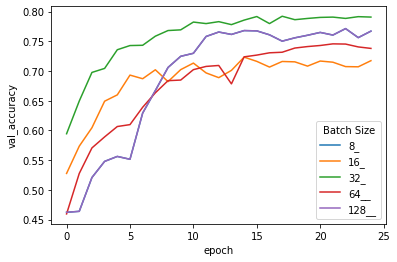

In [19]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [21]:
model = create_model(lr=0.75)

lr_high = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/25
1250/1250 [==============================] - 1s 582us/step - loss: 508.1224 - accuracy: 0.0981 - val_loss: 2.9298 - val_accuracy: 0.1000
Epoch 2/25
1250/1250 [==============================] - 1s 534us/step - loss: 34.6608 - accuracy: 0.0995 - val_loss: 2.3497 - val_accuracy: 0.0993
Epoch 3/25
1250/1250 [==============================] - 1s 534us/step - loss: 2.3584 - accuracy: 0.1008 - val_loss: 2.3671 - val_accuracy: 0.0993
Epoch 4/25
1250/1250 [==============================] - 1s 544us/step - loss: 2.3548 - accuracy: 0.1023 - val_loss: 2.3536 - val_accuracy: 0.0993
Epoch 5/25
1250/1250 [==============================] - 1s 594us/step - loss: 2.3577 - accuracy: 0.0997 - val_loss: 2.3361 - val_accuracy: 0.1001
Epoch 6/25
1250/1250 [==============================] - 1s 542us/step - loss: 2.3598 - accuracy: 0.0982 - val_loss: 2.3333 - val_accuracy: 0.0989
Epoch 7/25
1250/1250 [==============================] - 1s 544us/step - loss: 2.3584 - accuracy: 0.0991 - val_loss: 2.341

In [22]:
model = create_model(lr=0.4)

lr_mid = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/25
1250/1250 [==============================] - 1s 586us/step - loss: 114.0500 - accuracy: 0.1004 - val_loss: 2.3181 - val_accuracy: 0.0996
Epoch 2/25
1250/1250 [==============================] - 1s 591us/step - loss: 47.5713 - accuracy: 0.0995 - val_loss: 2.3225 - val_accuracy: 0.1000
Epoch 3/25
1250/1250 [==============================] - 1s 561us/step - loss: 2.3358 - accuracy: 0.0998 - val_loss: 2.3389 - val_accuracy: 0.1001
Epoch 4/25
1250/1250 [==============================] - 1s 546us/step - loss: 2.3335 - accuracy: 0.0992 - val_loss: 2.3272 - val_accuracy: 0.1006
Epoch 5/25
1250/1250 [==============================] - 1s 539us/step - loss: 2.3349 - accuracy: 0.0984 - val_loss: 2.3329 - val_accuracy: 0.1019
Epoch 6/25
1250/1250 [==============================] - 1s 564us/step - loss: 2.3344 - accuracy: 0.0990 - val_loss: 2.3221 - val_accuracy: 0.1019
Epoch 7/25
1250/1250 [==============================] - 1s 545us/step - loss: 2.3316 - accuracy: 0.1018 - val_loss: 2.324

In [23]:
model = create_model(lr=0.01)

lr_low = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/25
1250/1250 [==============================] - 1s 603us/step - loss: 2.5157 - accuracy: 0.1314 - val_loss: 2.0900 - val_accuracy: 0.1838
Epoch 2/25
1250/1250 [==============================] - 1s 543us/step - loss: 2.0478 - accuracy: 0.1981 - val_loss: 1.9409 - val_accuracy: 0.2571
Epoch 3/25
1250/1250 [==============================] - 1s 547us/step - loss: 1.9105 - accuracy: 0.2512 - val_loss: 1.9161 - val_accuracy: 0.2679
Epoch 4/25
1250/1250 [==============================] - 1s 590us/step - loss: 1.9121 - accuracy: 0.2528 - val_loss: 1.9176 - val_accuracy: 0.2558
Epoch 5/25
1250/1250 [==============================] - 1s 784us/step - loss: 1.9115 - accuracy: 0.2503 - val_loss: 1.9302 - val_accuracy: 0.2498
Epoch 6/25
1250/1250 [==============================] - 1s 596us/step - loss: 1.9073 - accuracy: 0.2532 - val_loss: 1.9104 - val_accuracy: 0.2594
Epoch 7/25
1250/1250 [==============================] - 1s 579us/step - loss: 1.9086 - accuracy: 0.2526 - val_loss: 1.9205 -

In [24]:
model = create_model(lr=0.001)

lr_lower = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/25
1250/1250 [==============================] - 1s 598us/step - loss: 2.5619 - accuracy: 0.4143 - val_loss: 1.3930 - val_accuracy: 0.5176
Epoch 2/25
1250/1250 [==============================] - 1s 550us/step - loss: 1.2930 - accuracy: 0.5655 - val_loss: 1.1995 - val_accuracy: 0.6025
Epoch 3/25
1250/1250 [==============================] - 1s 558us/step - loss: 1.1533 - accuracy: 0.6258 - val_loss: 1.1145 - val_accuracy: 0.6406
Epoch 4/25
1250/1250 [==============================] - 1s 566us/step - loss: 1.0740 - accuracy: 0.6536 - val_loss: 1.0581 - val_accuracy: 0.6661
Epoch 5/25
1250/1250 [==============================] - 1s 583us/step - loss: 1.0178 - accuracy: 0.6773 - val_loss: 1.0689 - val_accuracy: 0.6580
Epoch 6/25
1250/1250 [==============================] - 1s 555us/step - loss: 0.9632 - accuracy: 0.6981 - val_loss: 0.9650 - val_accuracy: 0.7130
Epoch 7/25
1250/1250 [==============================] - 1s 536us/step - loss: 0.9304 - accuracy: 0.7095 - val_loss: 0.9387 -

In [26]:
batch_sizes = []

for exp, result in zip([lr_low, lr_high, lr_mid,lr_lower], [".01", ".75", ".001"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result
    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,2.515727,0.131425,2.090048,0.18375,0,.01
1,2.047767,0.198150,1.940936,0.25710,1,.01
2,1.910548,0.251200,1.916122,0.26785,2,.01
3,1.912139,0.252750,1.917589,0.25575,3,.01
4,1.911541,0.250313,1.930195,0.24980,4,.01


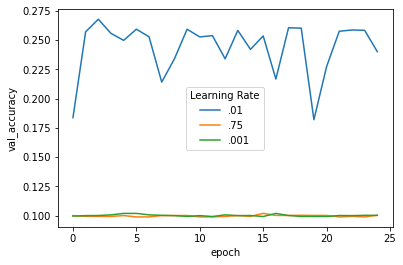

In [28]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [29]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Ftrl
from tensorflow.keras.optimizers import Nadam

In [30]:
def create_model2(opt, lr=0.001):
  opt = opt(learning_rate=lr)
  model = Sequential([
                      Dense(32, activation='relu', input_dim=784),
                      Dense(32, activation='relu'),
                      Dense(10, activation='softmax')
  ])
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model



In [31]:
model = create_model2(RMSprop, lr=.001)

RMSprop = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 2s 448us/step - loss: 1.7649 - accuracy: 0.5175 - val_loss: 1.2121 - val_accuracy: 0.6036
Epoch 2/30
5000/5000 [==============================] - 2s 431us/step - loss: 1.1883 - accuracy: 0.6674 - val_loss: 1.0415 - val_accuracy: 0.7255
Epoch 3/30
5000/5000 [==============================] - 2s 437us/step - loss: 1.0116 - accuracy: 0.7347 - val_loss: 0.9785 - val_accuracy: 0.7473
Epoch 4/30
5000/5000 [==============================] - 2s 430us/step - loss: 0.9937 - accuracy: 0.7434 - val_loss: 1.0431 - val_accuracy: 0.7530
Epoch 5/30
5000/5000 [==============================] - 2s 436us/step - loss: 1.0279 - accuracy: 0.7400 - val_loss: 1.0521 - val_accuracy: 0.7172
Epoch 6/30
5000/5000 [==============================] - 2s 430us/step - loss: 1.0610 - accuracy: 0.7394 - val_loss: 1.0319 - val_accuracy: 0.7326
Epoch 7/30
5000/5000 [==============================] - 2s 428us/step - loss: 1.0604 - accuracy: 0.7422 - val_loss: 1.0473 -

In [33]:
model = create_model2(Adadelta, lr=.001)

Adadelta = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 2s 454us/step - loss: 72.0502 - accuracy: 0.0928 - val_loss: 54.2239 - val_accuracy: 0.1062
Epoch 2/30
5000/5000 [==============================] - 2s 442us/step - loss: 44.6891 - accuracy: 0.1194 - val_loss: 37.4794 - val_accuracy: 0.1415
Epoch 3/30
5000/5000 [==============================] - 2s 433us/step - loss: 32.8450 - accuracy: 0.1545 - val_loss: 28.9475 - val_accuracy: 0.1695
Epoch 4/30
5000/5000 [==============================] - 2s 437us/step - loss: 25.8527 - accuracy: 0.1759 - val_loss: 23.1852 - val_accuracy: 0.1864
Epoch 5/30
5000/5000 [==============================] - 2s 435us/step - loss: 20.9004 - accuracy: 0.1900 - val_loss: 18.9661 - val_accuracy: 0.1963
Epoch 6/30
5000/5000 [==============================] - 2s 443us/step - loss: 17.1822 - accuracy: 0.2018 - val_loss: 15.7040 - val_accuracy: 0.2066
Epoch 7/30
5000/5000 [==============================] - 2s 441us/step - loss: 14.2424 - accuracy: 0.2104 - val_l

In [34]:
model = create_model2(Adagrad, lr=.001)

Adagrad = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 2s 457us/step - loss: 4.5476 - accuracy: 0.2812 - val_loss: 2.1425 - val_accuracy: 0.3098
Epoch 2/30
5000/5000 [==============================] - 2s 457us/step - loss: 2.0443 - accuracy: 0.3314 - val_loss: 1.9566 - val_accuracy: 0.3495
Epoch 3/30
5000/5000 [==============================] - 2s 449us/step - loss: 1.9250 - accuracy: 0.3552 - val_loss: 1.8798 - val_accuracy: 0.3649
Epoch 4/30
5000/5000 [==============================] - 2s 465us/step - loss: 1.8594 - accuracy: 0.3703 - val_loss: 1.8306 - val_accuracy: 0.3771
Epoch 5/30
5000/5000 [==============================] - 2s 453us/step - loss: 1.8132 - accuracy: 0.3826 - val_loss: 1.7924 - val_accuracy: 0.3891
Epoch 6/30
5000/5000 [==============================] - 2s 449us/step - loss: 1.7769 - accuracy: 0.3905 - val_loss: 1.7621 - val_accuracy: 0.3979
Epoch 7/30
5000/5000 [==============================] - 2s 453us/step - loss: 1.7466 - accuracy: 0.3986 - val_loss: 1.7362 -

In [35]:
model = create_model2(Adamax, lr=.001)

Adamax = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 2s 469us/step - loss: 2.4814 - accuracy: 0.3481 - val_loss: 1.4919 - val_accuracy: 0.4941
Epoch 2/30
5000/5000 [==============================] - 2s 470us/step - loss: 1.3670 - accuracy: 0.5313 - val_loss: 1.2656 - val_accuracy: 0.5685
Epoch 3/30
5000/5000 [==============================] - 2s 459us/step - loss: 1.2056 - accuracy: 0.5898 - val_loss: 1.1635 - val_accuracy: 0.6053
Epoch 4/30
5000/5000 [==============================] - 2s 467us/step - loss: 1.1201 - accuracy: 0.6223 - val_loss: 1.1056 - val_accuracy: 0.6377
Epoch 5/30
5000/5000 [==============================] - 2s 460us/step - loss: 1.0693 - accuracy: 0.6414 - val_loss: 1.0637 - val_accuracy: 0.6398
Epoch 6/30
5000/5000 [==============================] - 2s 468us/step - loss: 1.0318 - accuracy: 0.6574 - val_loss: 1.0376 - val_accuracy: 0.6445
Epoch 7/30
5000/5000 [==============================] - 2s 449us/step - loss: 1.0040 - accuracy: 0.6636 - val_loss: 1.0020 -

In [36]:
model = create_model2(Ftrl, lr=.001)

Ftrl = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 3s 504us/step - loss: 3.1081 - accuracy: 0.3632 - val_loss: 1.8319 - val_accuracy: 0.3873
Epoch 2/30
5000/5000 [==============================] - 2s 458us/step - loss: 1.7014 - accuracy: 0.4294 - val_loss: 1.6347 - val_accuracy: 0.4616
Epoch 3/30
5000/5000 [==============================] - 2s 460us/step - loss: 1.5677 - accuracy: 0.4716 - val_loss: 1.5429 - val_accuracy: 0.4839
Epoch 4/30
5000/5000 [==============================] - 2s 451us/step - loss: 1.4910 - accuracy: 0.4944 - val_loss: 1.4806 - val_accuracy: 0.5026
Epoch 5/30
5000/5000 [==============================] - 2s 451us/step - loss: 1.4347 - accuracy: 0.5096 - val_loss: 1.4328 - val_accuracy: 0.5132
Epoch 6/30
5000/5000 [==============================] - 2s 452us/step - loss: 1.3909 - accuracy: 0.5218 - val_loss: 1.3947 - val_accuracy: 0.5239
Epoch 7/30
5000/5000 [==============================] - 2s 465us/step - loss: 1.3552 - accuracy: 0.5361 - val_loss: 1.3622 -

In [37]:
model = create_model2(Nadam, lr=.001)

Nadam = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 2s 476us/step - loss: 2.0105 - accuracy: 0.4663 - val_loss: 1.2403 - val_accuracy: 0.5846
Epoch 2/30
5000/5000 [==============================] - 2s 475us/step - loss: 1.1984 - accuracy: 0.6143 - val_loss: 1.1481 - val_accuracy: 0.6403
Epoch 3/30
5000/5000 [==============================] - 2s 463us/step - loss: 1.0782 - accuracy: 0.6738 - val_loss: 1.0383 - val_accuracy: 0.6898
Epoch 4/30
5000/5000 [==============================] - 2s 461us/step - loss: 0.9875 - accuracy: 0.7086 - val_loss: 0.9441 - val_accuracy: 0.7189
Epoch 5/30
5000/5000 [==============================] - 2s 456us/step - loss: 0.9221 - accuracy: 0.7323 - val_loss: 0.9340 - val_accuracy: 0.7110
Epoch 6/30
5000/5000 [==============================] - 2s 464us/step - loss: 0.8616 - accuracy: 0.7524 - val_loss: 0.8696 - val_accuracy: 0.7542
Epoch 7/30
5000/5000 [==============================] - 2s 452us/step - loss: 0.8215 - accuracy: 0.7607 - val_loss: 0.8242 -

In [41]:
for exp, result in zip([RMSprop, Adadelta, Adagrad, Adamax, Ftrl,Nadam], ["RMSprop", "Adadelta", "Adagrad", "Adamax", "Ftrl","Nadam"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Optimzers'] = result
    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Optimzers'] = df['Optimzers'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate,Optimzers
0,2.515727,0.131425,2.090048,0.18375,0,.01,nan
1,2.047767,0.198150,1.940936,0.25710,1,.01,nan
2,1.910548,0.251200,1.916122,0.26785,2,.01,nan
3,1.912139,0.252750,1.917589,0.25575,3,.01,nan
4,1.911541,0.250313,1.930195,0.24980,4,.01,nan


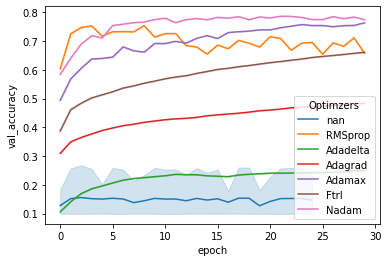

In [42]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Optimzers', data=df);

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Backpropagation trains neural networks,it uses weights (neurons). Using inputs, hidden layers it gives the output and shows accuracy for the model

```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


